# The Epinician Database Excersice

For the A3 exercise I have decided to use my own database of Epinician poetry. This was a genre of ancient Greek poetry during mostly the early 4th century B.C. This type of poetry was specifically dedicated to an athlete winning a crown competition (such as the Olympics). In this database I have collected information on the victors of these competitions, their home city, the dating of the poems (wherever possible) and the myths mentioned. Lastly I've included references and links to the RUG's Connected Contests Database when Athletes were mentioned there. Disclaimer: I've made this database in 2019, so before I knew anything about proper database design. Therefore the format may be slightly rough.

I will start this exercise by loading the csv file in which the database is stored and checking what is in there by looking at the basic info and a sample of the database. 

In [1]:
import pandas as pd
import csv

In [3]:
df = pd.read_csv('Downloads/The Epinician Database.csv', delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  75 non-null     int64  
 1   Poem                75 non-null     object 
 2   Dating (estimated)  53 non-null     float64
 3   Author              75 non-null     object 
 4   Author origins      75 non-null     object 
 5   Victor (subject)    69 non-null     object 
 6   Victor city         69 non-null     object 
 7   Event               72 non-null     object 
 8   Focusing myth       42 non-null     object 
 9   Reference           75 non-null     object 
 10  Connected contests  32 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 6.6+ KB


In [10]:
df.sample(5)

,ID,Poem,Dating (estimated),Author,Author origins,Victor (subject),Victor city,Event,Focusing myth,Reference,Connected contests
9,19,Isthmian 5,-480.0,Pindar,"Thebes, Boeotia",Phylacides of Aegina,"Aegina, Aegina",Pancration,"Aeacidae, Achilles","Bowra, Pindar, 406-413. Race (ed & trans), Ist...",http://connectedcontests.org/database/persons/...
54,64,Bacch. 10,NaN,Bacchylides,"Ioulis, Keos",Aglaos of Athens,"Athens, Attica",Foot-race,NaN,"Jebb, Bacchylides, 207-208.",NaN
43,53,Nemean 11,-446.0,Pindar,"Thebes, Boeotia",Aristagoras of Tenedos,"Tenedos, Aegean Island",Inauguration as Prytanis,NaN,"Bowra, Pindar, 406-413. Race (ed & trans), Nem...",NaN
23,33,Isthmian 3,-476.0,Pindar,"Thebes, Boeotia",Melissus of Thebes,"Thebes, Boeotia",Chariot-race,NaN,"Bowra, Pindar, 406-413. Race (ed & trans), Ist...",http://connectedcontests.org/database/persons/...
40,50,Olympian 5,-448.0,Pindar,"Thebes, Boeotia",Psaumis of Camarina,"Camarina, Sicily",Chariot-race with mules,NaN,"Bowra, Pindar, 406-413. Race (ed & trans), Oly...",NaN


## Questions

What are the amount of poems written by each author in the database?

In [74]:
df['Author'].value_counts()

Pindar         47
Bacchylides    15
Simonides      13
Name: Author, dtype: int64

Plot the (known) dating of the Epinician poems in a lineplot. 

<AxesSubplot:xlabel='Dating (estimated)'>

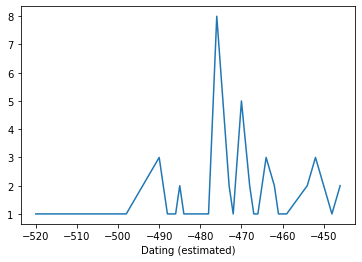

In [73]:
Poems_Year = df.groupby('Dating (estimated)')['Poem'].count()
Poems_Year.plot()
#you can clearly see the most productive period being the 480-465 B.C.

Count the 10 most frequent sporting events described in the poems and visualise them using a barplot.

<AxesSubplot:title={'center':'Most frequent events described in Epinician poems'}>

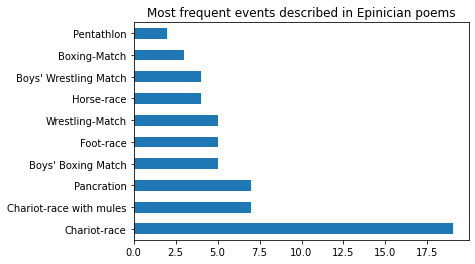

In [58]:
df['Event'].value_counts()[:10].plot(kind='barh', title='Most frequent events described in Epinician poems')

We know that athletic competitors from Aegina are mentioned most in the Corpus. Look up the kind of competition events the competitors won, and plot these in a pie chart. 

<AxesSubplot:title={'center':'Events won by Aeginan competitors'}, ylabel='Event'>

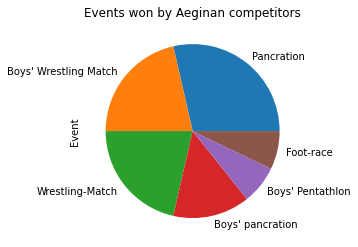

In [70]:
Aegina_poems = df[df['Victor city'] == 'Aegina, Aegina']
Aegina_poems['Event'].value_counts().plot(kind='pie', title='Events won by Aeginan competitors')

Which Victors have Bacchylides and Pindar both written about?

In [70]:
Pindar_subjects = df.loc[df['Author'] == 'Pindar', 'Victor (subject)']
Bacchylides_subjects = df.loc[df['Author']== 'Bacchylides', 'Victor (subject)']

Common_subjects = []
for index, athletep in Pindar_subjects.items():
    for index, athleteb in Bacchylides_subjects.items():
        if athletep == athleteb:
            Common_subjects.append(athleteb)

Common_subjects = list(dict.fromkeys(Common_subjects))
print(Common_subjects)

['Pythias of Aegina', 'Hieron of Syracuse']
